#### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import os

In [2]:
RESULTS = '/Users/megantennies/FYP/results'

#### Reoffending rates based on prior convictions

In [3]:
priors = {'Years since conviction': [1, 2, 3, 4, 5, 6],
    '0': [10, 7, 4, 4, 4, 3],
    '1': [23, 25, 10, 10, 8, 4],
    '2-4': [35, 22, 12, 14, 11, 8],
    '5+': [53, 31, 28, 26, 15, 18]}
priors_cum = {'Years since conviction': [1, 2, 3, 4, 5, 6],
    '0': [10, 17, 21, 25, 29, 32],
    '1': [23, 48, 58, 68, 76, 80],
    '2-4': [35, 57, 69, 83, 94, 102],
    '5+': [53, 84, 112, 138, 153, 171]}

In [9]:
rgbs = [(201,234,194), (134,203,129), (59,160,79), (26,108,45)]
colours = [tuple(t / 255 for t in x) for x in rgbs]

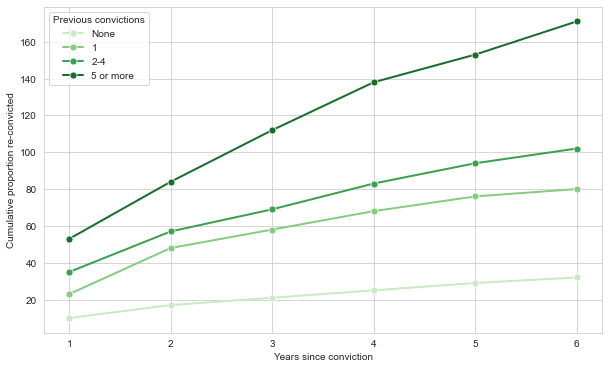

In [16]:
plt.figure(figsize = (10, 6))
ax = sns.lineplot(x = 'Years since conviction', y = '0', data = priors_cum, marker = 'o', linewidth = 2, markersize = 7, color = colours[0])
ax = sns.lineplot(x = 'Years since conviction', y = '1', data = priors_cum, marker = 'o', linewidth = 2, markersize = 7, color = colours[1])
ax = sns.lineplot(x = 'Years since conviction', y = '2-4', data = priors_cum, marker = 'o', linewidth = 2, markersize = 7, color = colours[2])
ax = sns.lineplot(x = 'Years since conviction', y = '5+', data = priors_cum, marker = 'o', linewidth = 2, markersize = 7, color = colours[3])
ax.set_ylabel('Cumulative proportion re-convicted')
sns.set_style('whitegrid')
plt.legend(title = 'Previous convictions', labels = ['None', '1', '2-4', '5 or more'])
plt.savefig('1_priors_reoffends.png', bbox_inches = 'tight')

#### Imprisonment rates, 2010-2020

In [221]:
white = {'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 
    'Rate': [248, 243, 238, 237, 234, 228, 223, 221, 218, 214, 183],
    'Race': ['White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White']}
white = pd.DataFrame(white)

black =  {'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Rate': [1489, 1438, 1377, 1348, 1302, 1239, 1199, 1161, 1124, 1088, 938], 
    'Race': ['Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black']}
black = pd.DataFrame(black)

imprisonment_rates = pd.concat([white, black], axis = 0)

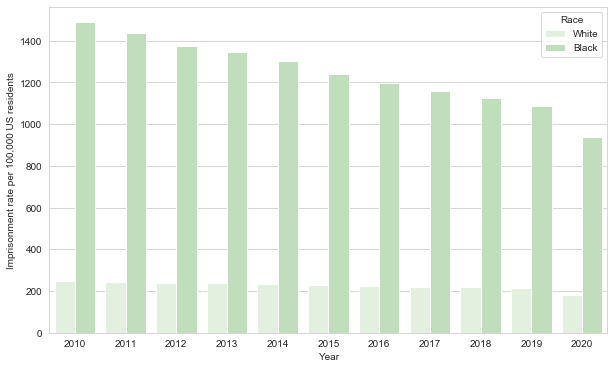

In [222]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'Year', y = 'Rate', hue = 'Race', data = imprisonment_rates, palette = sns.color_palette('Greens'))
ax.set_ylabel('Imprisonment rate per 100,000 US residents')
sns.set_style('whitegrid')
plt.savefig(os.path.join(RESULTS, 'MTHD_imprisonment.png'), bbox_inches = 'tight')

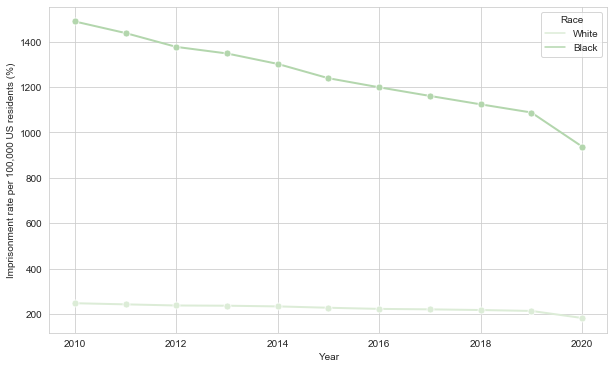

In [223]:
plt.figure(figsize = (10, 6))
ax = sns.lineplot(x = 'Year', y = 'Rate', hue = 'Race', data = imprisonment_rates, 
    palette = (['#DCECD7', '#B3D6AD']), marker = 'o', linewidth = 2, markersize = 7)
ax.set_ylabel('Imprisonment rate per 100,000 US residents (%)')
sns.set_style('whitegrid')
plt.savefig(os.path.join(RESULTS, 'MTHD_imprisonment_line.png'), bbox_inches = 'tight')

#### Cumulative Re-arrest rates for 10 years after release (released in 2008)

In [210]:
white = {'Year': ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5', 'Year 6', 'Year 7', 'Year 8', 'Year 9', 'Year 10'], 
    'Rate': [39.6, 54.8, 63.2, 68.4, 72.3, 75.0, 76.9, 78.3, 79.4, 80.2],
    'Race': ['White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White']}
white = pd.DataFrame(white)

black =  {'Year': ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5', 'Year 6', 'Year 7', 'Year 8', 'Year 9', 'Year 10'],
    'Rate': [45.2, 61.4, 69.7, 75.1, 78.6, 81.1, 82.7, 83.7, 84.7, 85.6], 
    'Race': ['Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black']}
black = pd.DataFrame(black)

rearrest_rates = pd.concat([white, black], axis = 0)

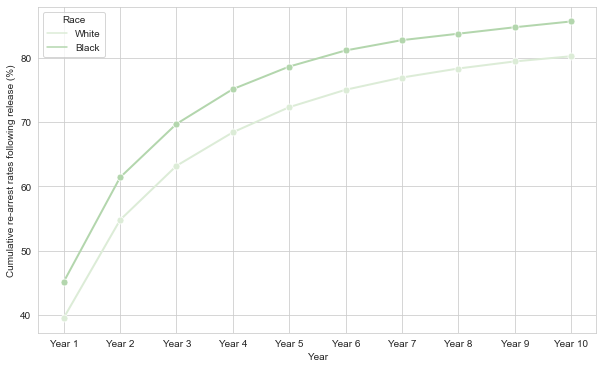

In [219]:
plt.figure(figsize = (10, 6))
ax = sns.lineplot(x = 'Year', y = 'Rate', hue = 'Race', data = rearrest_rates, 
    palette = (['#DCECD7', '#B3D6AD']), marker = 'o', linewidth = 2, markersize = 7)
ax.set_ylabel('Cumulative re-arrest rates following release (%)')
sns.set_style('whitegrid')
plt.savefig(os.path.join(RESULTS, 'MTHD_rearrest_line.png'), bbox_inches = 'tight')

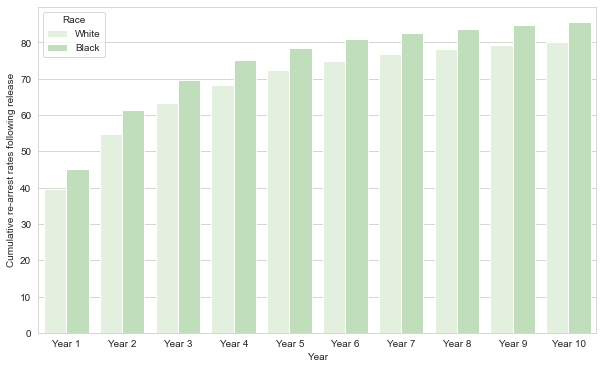

In [15]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'Year', y = 'Rate', hue = 'Race', data = rearrest_rates, palette = sns.color_palette('Greens'))
ax.set_ylabel('Cumulative re-arrest rates following release')
sns.set_style('whitegrid')
plt.savefig(os.path.join(RESULTS, 'MTHD_rearrest_bar.png'), bbox_inches = 'tight')

#### Prison Populations

**In 2020**

In [75]:
pop_labels = ['White', 'Black', 'Hispanic', 'Native American', 'Asian']
pop_data = [358900, 389500, 275300, 19000, 14900]
pop_explode = [0, 0.1, 0, 0, 0] 
colours = ['#E0E0E0', '#B3D6AD', '#B0B0B0', '#C0C0C0', '#D0D0D0']

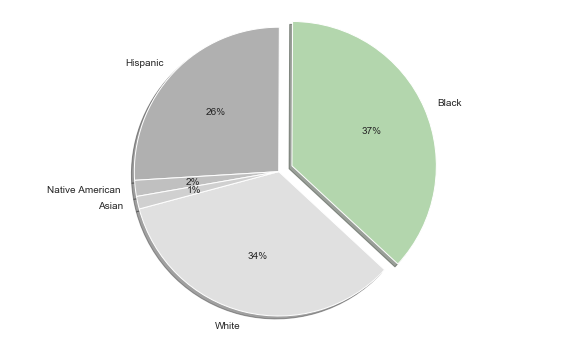

In [76]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.pie(x = pop_data, labels = pop_labels, colors = colours, 
    explode = pop_explode, startangle = 195, shadow = True, autopct = '%.0f%%')
ax.axis('equal')
plt.savefig(os.path.join(RESULTS, 'MTHD_prison_pop_2020.png'), bbox_inches = 'tight')

**Over a decade**

In [40]:
pop_labels_2010 = ['White', 'Black', 'Hispanic', 'Native American', 'Asian']
pop_data_2010 = [490500, 568500, 338500, 23800, 16700]

pop_labels_2020 = ['White', 'Black', 'Hispanic', 'Native American', 'Asian']
pop_data_2020 = [358900, 389500, 275300, 19000, 14900]

#### Stops 2002-2019

In [35]:
years = ['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
years = pd.DataFrame(years)
years = years.rename(columns = {0: 'Year'})

stops = [97296, 160851, 313523, 398191, 506491, 472096, 540302, 581168, 601285, 685724, 532911, 191851, 45787, 22563, 12404, 11629, 11008, 13459]
stops = pd.DataFrame(stops)
stops = stops.rename(columns = {0: 'Count'})

stop_rates = pd.concat([years, stops], axis = 1)

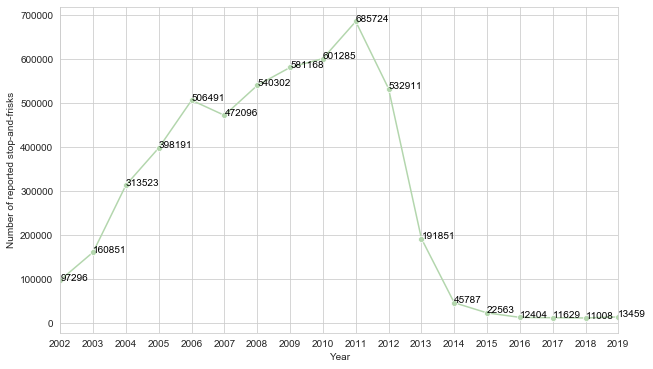

In [36]:
plt.figure(figsize = (10, 6))
ax = sns.lineplot(x = 'Year', y = 'Count', data = stop_rates, color = '#B3D6AD', marker = 'o')

for x, y in zip(stop_rates['Year'], stop_rates['Count']):
    plt.text(x = x, y = y, s = '{:}'.format(y), color = 'black') #.set_backgroundcolor('#B3D6AD')

ax.set_ylabel('Number of reported stop-and-frisks')
ax.set_xlim(left='2002', right='2019')
sns.set_style('whitegrid')
plt.savefig(os.path.join(RESULTS, 'MTHD_stop_rates.png'), bbox_inches = 'tight')

#### Stops by Race

In [62]:
pop_labels = ['White', 'Black', 'Hispanic', 'Native American & Asian']
pop_data = [33.2, 22.9, 28.7, 15.2]

stops_labels = ['White', 'Black', 'Hispanic', 'Native American & Asian']
stops_data = [9.3, 52.9, 33.7, 4.1]

pop_explode = [0, 0.1, 0, 0] 
colours = ['#E0E0E0', '#B3D6AD', '#C0C0C0', '#D0D0D0']

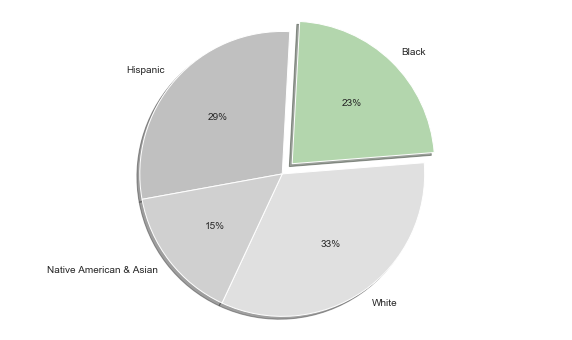

In [69]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.pie(x = pop_data, labels = pop_labels, colors = colours, 
    explode = pop_explode, startangle = 245, shadow = True, autopct = '%.0f%%')
ax.axis('equal')
plt.savefig(os.path.join(RESULTS, 'MTHD_nypd_pop.png'), bbox_inches = 'tight')

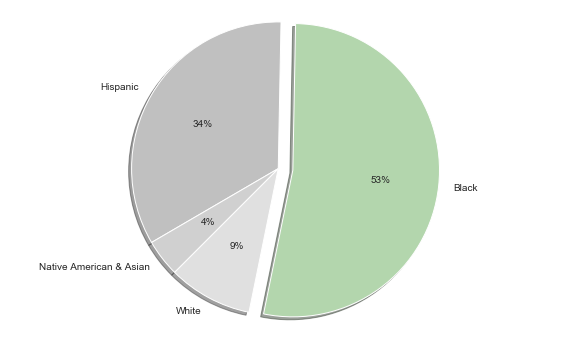

In [73]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.pie(x = stops_data, labels = stops_labels, colors = colours, 
    explode = pop_explode, startangle = 225, shadow = True, autopct = '%.0f%%')
ax.axis('equal')
plt.savefig(os.path.join(RESULTS, 'MTHD_nypd_stops.png'), bbox_inches = 'tight')

#### Marijuana use and posessession arrests

**Arrest rates**

In [155]:
white = {'Year': [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010], 
    'Arrest Rate': [180, 190, 195, 190, 198, 201, 200, 197, 196],
    'Race': ['White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White']}
white = pd.DataFrame(white)

black =  {'Year': [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010], 
    'Arrest Rate': [520, 560, 608, 648, 702, 737, 718, 725, 716],
    'Race': ['Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black']}
black = pd.DataFrame(black)

arrest_rates = pd.concat([white, black], axis = 0)

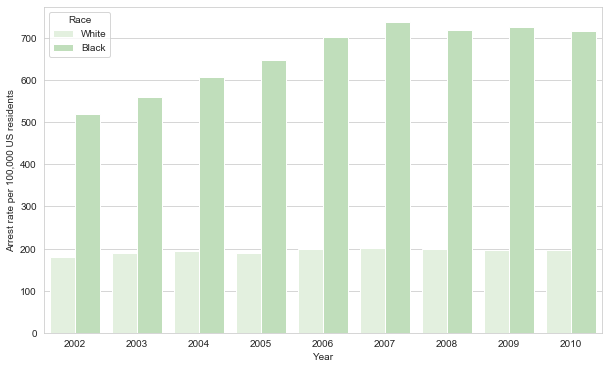

In [156]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'Year', y = 'Arrest Rate', hue = 'Race', data = arrest_rates, palette = sns.color_palette('Greens'))
ax.set_ylabel('Arrest rate per 100,000 US residents')
sns.set_style('whitegrid')
plt.savefig(os.path.join(RESULTS, 'MTHD_marij_arrest.png'), bbox_inches = 'tight')

In [157]:
white = {'Year': [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010], 
    'Usage Rate': [8.5, 8.3, 8.1, 8.1, 8.5, 8.2, 8.2, 8.8, 9.1],
    'Race': ['White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White']}
white = pd.DataFrame(white)

black =  {'Year': [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010], 
    'Usage Rate': [9.7, 8.7, 8.7, 9.7, 9.8, 9.5, 10.1, 9.6, 10.7],
    'Race': ['Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black']}
black = pd.DataFrame(black)

use_rates = pd.concat([white, black], axis = 0)

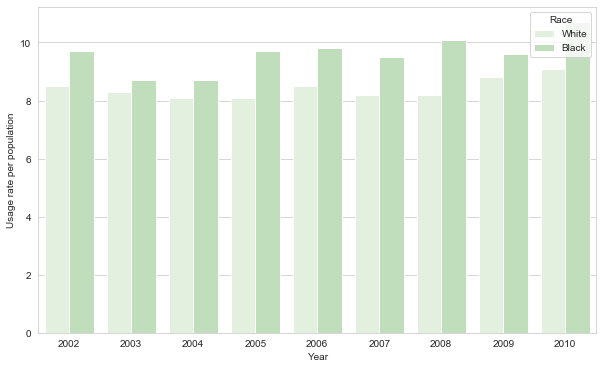

In [158]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'Year', y = 'Usage Rate', hue = 'Race', data = use_rates, palette = sns.color_palette('Greens'))
ax.set_ylabel('Usage rate per population')
sns.set_style('whitegrid')
plt.savefig(os.path.join(RESULTS, 'MTHD_marij_usage.png'), bbox_inches = 'tight')

In [179]:
years = ['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010']

arrest_rate_black = [520, 560, 608, 648, 702, 737, 718, 725, 716]
arrest_rate_white = [180, 190, 195, 190, 198, 201, 200, 197, 196]

use_rate_black = [9.7, 8.7, 8.7, 9.7, 9.8, 9.5, 10.1, 9.6, 10.7]
use_rate_white = [8.5, 8.3, 8.1, 8.1, 8.5, 8.2, 8.2, 8.8, 9.1]

x = np.arange(len(years))
width = 0.35

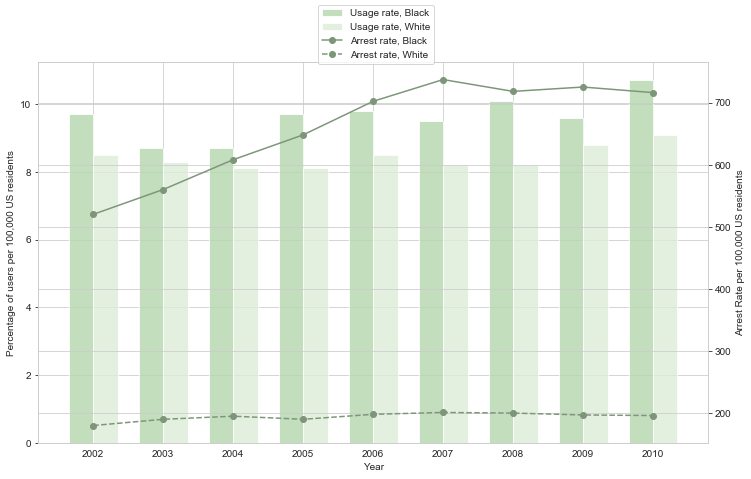

In [208]:
fig, ax1 = plt.subplots(figsize = (12, 7))
ax1.bar(x - width / 2, use_rate_black, width, color = '#B3D6AD', label = 'Black', alpha = 0.8)
ax1.bar(x + width / 2, use_rate_white, width, color = '#DCECD7', label = 'White', alpha = 0.8)
ax1.set_ylabel('Percentage of users per 100,000 US residents')
ax1.set_xlabel('Year')

ax2 = ax1.twinx()
ax2.plot(years, arrest_rate_black, color = '#7d9679', marker = 'o')
ax2.plot(years, arrest_rate_white, color = '#7d9679', linestyle = 'dashed', marker = 'o')
ax2.set_xlabel('Year')
ax2.set_ylabel('Arrest Rate per 100,000 US residents')
ax2.grid(True)

fig.legend(labels = ['Usage rate, Black', 'Usage rate, White', 'Arrest rate, Black', 'Arrest rate, White'], loc = 'upper center')
plt.savefig(os.path.join(RESULTS, 'MTHD_marij_joint.png'), bbox_inches = 'tight')

#### Race in EngInf

In [91]:
pop_labels_comp = ['White', 'Black', 'Hispanic', 'Asian', 'Other']
pop_data_comp = [71, 5, 9, 13, 2]

pop_labels_eng = ['White', 'Black', 'Hispanic', 'Asian', 'Other']
pop_data_eng = [62, 7, 8, 10, 3]

pop_explode = [0.1, 0, 0, 0, 0] 
colours = ['#B0B0B0', '#B3D6AD', '#B3D6AD', '#B3D6AD', '#B3D6AD']

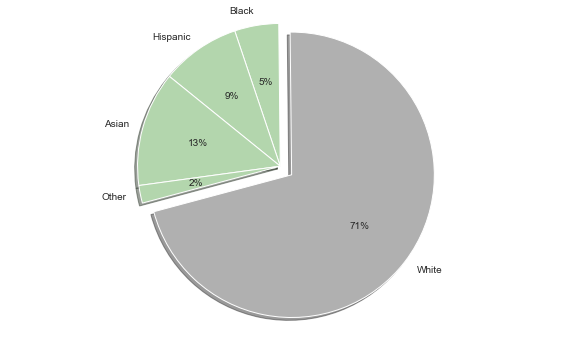

In [98]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.pie(x = pop_data_comp, labels = pop_labels_comp, colors = colours, 
    explode = pop_explode, startangle = 195, shadow = True, autopct = '%.0f%%')
ax.axis('equal')
plt.savefig(os.path.join(RESULTS, 'MTHD_comp_race.png'), bbox_inches = 'tight')

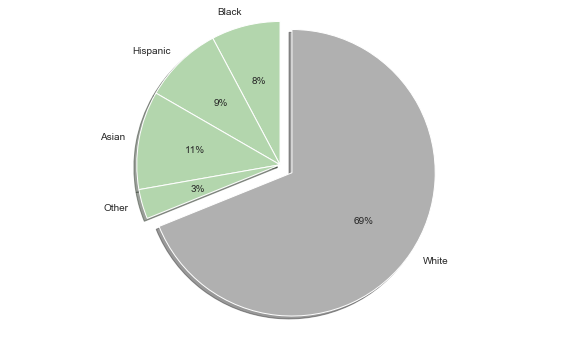

In [103]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.pie(x = pop_data_eng, labels = pop_labels_eng, colors = colours, 
    explode = pop_explode, startangle = 202, shadow = True, autopct = '%.0f%%')
ax.axis('equal')
plt.savefig(os.path.join(RESULTS, 'MTHD_eng_race.png'), bbox_inches = 'tight')

#### Gender in EngInf

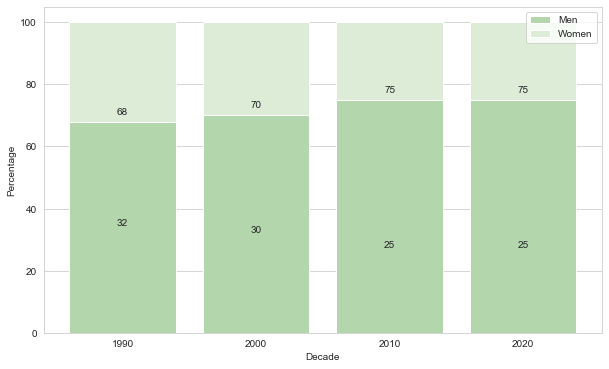

In [148]:
# computing
decades = ['1990', '2000', '2010', '2020']
mens = [68, 70, 75, 75]
womens = [32, 30, 25, 25]

fig, ax = plt.subplots(figsize = (10, 6))
sns.set_style('whitegrid')
ax.bar(decades, mens, label = 'Men', color = '#B3D6AD')
ax.bar(decades, womens, bottom = mens, label = 'Women', color = '#DCECD7')

for val in ax.patches:
    ax.annotate(format(val.get_height(), '.0f'), (val.get_x() + val.get_width() / 2., val.get_height()),
        ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.grid(axis = 'x')
plt.xlabel('Decade')
plt.ylabel('Percentage')
plt.legend()
plt.savefig(os.path.join(RESULTS, 'MTHD_comp_gender.png'), bbox_inches = 'tight')

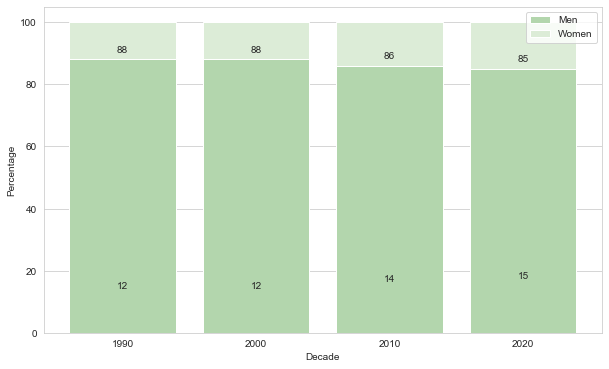

In [149]:
# engineering
decades = ['1990', '2000', '2010', '2020']
mens = [88, 88, 86, 85]
womens = [12, 12, 14, 15]

fig, ax = plt.subplots(figsize = (10, 6))
sns.set_style('whitegrid')
ax.bar(decades, mens, label = 'Men', color = '#B3D6AD')
ax.bar(decades, womens, bottom = mens, label = 'Women', color = '#DCECD7')

for val in ax.patches:
    ax.annotate(format(val.get_height(), '.0f'), (val.get_x() + val.get_width() / 2., val.get_height()),
        ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.grid(axis = 'x')
plt.xlabel('Decade')
plt.ylabel('Percentage')
plt.legend()
plt.savefig(os.path.join(RESULTS, 'MTHD_eng_gender.png'), bbox_inches = 'tight')

#### Old, keep but not needed

In [17]:
white = {'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 
    'Rate': [248, 243, 238, 237, 234, 228, 223, 221, 218, 214, 183],
    'Race': ['White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White']}
white = pd.DataFrame(white)
black =  {'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Rate': [1489, 1438, 1377, 1348, 1302, 1239, 1199, 1161, 1124, 1088, 938], 
    'Race': ['Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black']}
black = pd.DataFrame(black)
hispanic = {'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Rate': [658, 650, 629, 630, 611, 592, 591, 575, 555, 530, 446], 
    'Race': ['Hispanic', 'Hispanic', 'Hispanic', 'Hispanic', 'Hispanic', 'Hispanic', 'Hispanic', 'Hispanic', 
        'Hispanic', 'Hispanic', 'Hispanic']}
hispanic = pd.DataFrame(hispanic)
native = {'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Rate': [1044, 983, 927, 846, 903, 863, 853, 881, 873, 885, 778], 
    'Race': ['Native American', 'Native American', 'Native American', 'Native American', 'Native American', 
        'Native American', 'Native American', 'Native American', 'Native American', 'Native American', 'Native American']} 
native = pd.DataFrame(native)
asian = {'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Rate': [108, 107, 103, 99, 98, 98, 96, 93, 92, 88, 74], 
    'Race': ['Asian', 'Asian', 'Asian', 'Asian', 'Asian', 'Asian', 'Asian', 'Asian', 'Asian', 'Asian', 'Asian']}
asian = pd.DataFrame(asian)
imprisonment_rates_all = pd.concat([white, black, hispanic, native, asian], axis = 0)
imp_rates_wb = pd.concat([white, black], axis = 0)
imp_rates_wbh = pd.concat([white, black, hispanic], axis = 0)

plt.figure(figsize = (16, 8))
ax = sns.barplot(x = 'Year', y = 'Rate', hue = 'Race', data = imprisonment_rates_all, palette = sns.color_palette('Greens'))
ax.set_ylabel('Imprisonment rate per 100,000 US residents')
sns.set_style('whitegrid')
plt.savefig(os.path.join(RESULTS, 'imprisonment_rates_all.png'), bbox_inches = 'tight')

plt.figure(figsize = (10, 7))
ax = sns.barplot(x = 'Year', y = 'Rate', hue = 'Race', data = imp_rates_wbh, palette = sns.color_palette('Greens'))
ax.set_ylabel('Imprisonment rate per 100,000 US residents')
sns.set_style('whitegrid')
plt.savefig(os.path.join(RESULTS, 'imprisonment_rates_wbh.png'), bbox_inches = 'tight')

In [18]:
white = {'Year': ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5', 'Year 6', 'Year 7', 'Year 8', 'Year 9', 'Year 10'], 
    'Rate': [39.6, 54.8, 63.2, 68.4, 72.3, 75.0, 76.9, 78.3, 79.4, 80.2],
    'Race': ['White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White']}
white = pd.DataFrame(white)
black =  {'Year': ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5', 'Year 6', 'Year 7', 'Year 8', 'Year 9', 'Year 10'],
    'Rate': [45.2, 61.4, 69.7, 75.1, 78.6, 81.1, 82.7, 83.7, 84.7, 85.6], 
    'Race': ['Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black']}
black = pd.DataFrame(black)
hispanic = {'Year': ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5', 'Year 6', 'Year 7', 'Year 8', 'Year 9', 'Year 10'],
    'Rate': [44.2, 57.8, 65.4, 69.6, 72.8, 75.3, 76.7, 77.5, 78.3, 78.9], 
    'Race': ['Hispanic', 'Hispanic', 'Hispanic', 'Hispanic', 'Hispanic', 'Hispanic', 'Hispanic', 'Hispanic', 
        'Hispanic', 'Hispanic']}
hispanic = pd.DataFrame(hispanic)
native = {'Year': ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5', 'Year 6', 'Year 7', 'Year 8', 'Year 9', 'Year 10'],
    'Rate': [50.7, 65.7, 72.8, 76.3, 78.8, 80.8, 82.1, 83.1, 84.3, 84.7], 
    'Race': ['Native American', 'Native American', 'Native American', 'Native American', 'Native American', 
        'Native American', 'Native American', 'Native American', 'Native American', 'Native American']} 
native = pd.DataFrame(native)
asian = {'Year': ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5', 'Year 6', 'Year 7', 'Year 8', 'Year 9', 'Year 10'],
    'Rate': [41.3, 57.2, 63.5, 67.2, 68.9, 70.2, 70.8, 73.2, 73.8, 74.4], 
    'Race': ['Asian', 'Asian', 'Asian', 'Asian', 'Asian', 'Asian', 'Asian', 'Asian', 'Asian', 'Asian']}
asian = pd.DataFrame(asian)
rearrest_rates_all = pd.concat([white, black, hispanic, native, asian], axis = 0)
rearrest_rates_wb = pd.concat([white, black], axis = 0)
rearrest_rates_wbh = pd.concat([white, black, hispanic], axis = 0)

plt.figure(figsize = (12, 8))
ax = sns.lineplot(x = 'Year', y = 'Rate', hue = 'Race', data = rearrest_rates_all, palette = sns.color_palette('Greens', 5))
ax.set_ylabel('Cumulative re-arrest rates following release')
sns.set_style('whitegrid')
plt.savefig(os.path.join(RESULTS, 'rearrest_rates_all_line.png'), bbox_inches = 'tight')